In [ ]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/drive/MyDrive/ethereum_price.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-03-08,"1,553.49","1,561.79","1,569.70","1,548.98",498.57K,-0.53%
2023-03-07,"1,561.78","1,565.84","1,580.95","1,536.31",460.10K,-0.26%
2023-03-06,"1,565.84","1,564.36","1,581.13","1,555.43",322.16K,0.09%
2023-03-05,"1,564.37","1,566.73","1,587.95","1,556.84",313.01K,-0.15%
2023-03-04,"1,566.73","1,569.45","1,577.02","1,550.10",247.02K,-0.14%


In [ ]:
df.columns

Index(['Price'], dtype='object')

In [ ]:
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
df.head()

,Price
Date,
2023-03-08,"1,553.49"
2023-03-07,"1,561.78"
2023-03-06,"1,565.84"
2023-03-05,"1,564.37"
2023-03-04,"1,566.73"


In [ ]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2555 entries, 2023-03-08 to 2016-03-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2555 non-null   float64
dtypes: float64(1)
memory usage: 39.9 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2555 entries, 2023-03-08 to 2016-03-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2555 non-null   object
dtypes: object(1)
memory usage: 39.9+ KB


In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-04-02 06:46:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-02 06:46:41 (7.32 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’ saved [178509/178509]



In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]



([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/drive/MyDrive/ethereum_price.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")  # read in the target CSV
    next(csv_reader)  # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[0], "%b %d, %Y"))  # get the dates as dates (not strings), strptime = string parse time
        price = float(line[2].replace(",", ""))  # remove commas from the price string
        eth_price.append(price)  # get the closing price as float

# View first 10 of each
timesteps[:10], eth_price[:10]



([datetime.datetime(2023, 3, 8, 0, 0),
  datetime.datetime(2023, 3, 7, 0, 0),
  datetime.datetime(2023, 3, 6, 0, 0),
  datetime.datetime(2023, 3, 5, 0, 0),
  datetime.datetime(2023, 3, 4, 0, 0),
  datetime.datetime(2023, 3, 3, 0, 0),
  datetime.datetime(2023, 3, 2, 0, 0),
  datetime.datetime(2023, 3, 1, 0, 0),
  datetime.datetime(2023, 2, 28, 0, 0),
  datetime.datetime(2023, 2, 27, 0, 0)],
 [1561.79,
  1565.84,
  1564.36,
  1566.73,
  1569.45,
  1647.86,
  1666.09,
  1604.69,
  1633.66,
  1641.59])

In [ ]:
import csv

with open("/content/drive/MyDrive/ethereum_price.csv", 'r') as file:
    reader = csv.reader(file)
    rows = [row for row in reader]
    num_rows = len(rows)
    last_rows = rows[5:]
    for row in last_rows:
        print(row)
    print(f'Total number of rows: {num_rows}')






In [ ]:
line

['Mar 10, 2016', '11.75', '11.20', '11.85', '11.07', '0.00K', '4.91%']

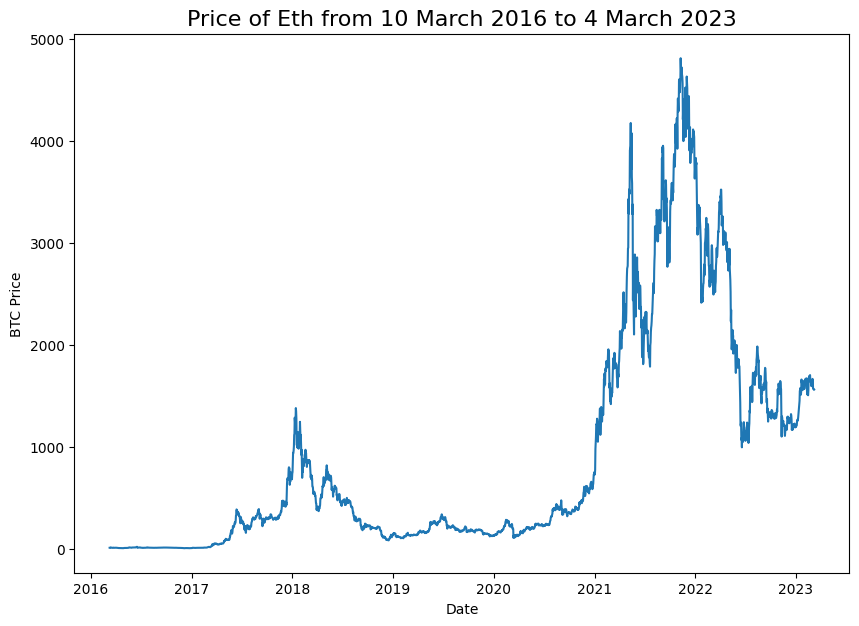

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, eth_price)
plt.title("Price of Eth from 10 March 2016 to 4 March 2023", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:


# Get eth date array
timesteps = np.array(timesteps)
prices = np.array(eth_price)

print(timesteps[:10], prices[:10])

[datetime.datetime(2023, 3, 8, 0, 0) datetime.datetime(2023, 3, 7, 0, 0)
 datetime.datetime(2023, 3, 6, 0, 0) datetime.datetime(2023, 3, 5, 0, 0)
 datetime.datetime(2023, 3, 4, 0, 0) datetime.datetime(2023, 3, 3, 0, 0)
 datetime.datetime(2023, 3, 2, 0, 0) datetime.datetime(2023, 3, 1, 0, 0)
 datetime.datetime(2023, 2, 28, 0, 0) datetime.datetime(2023, 2, 27, 0, 0)] [1561.79 1565.84 1564.36 1566.73 1569.45 1647.86 1666.09 1604.69 1633.66
 1641.59]


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2044, 511, 2044, 511)

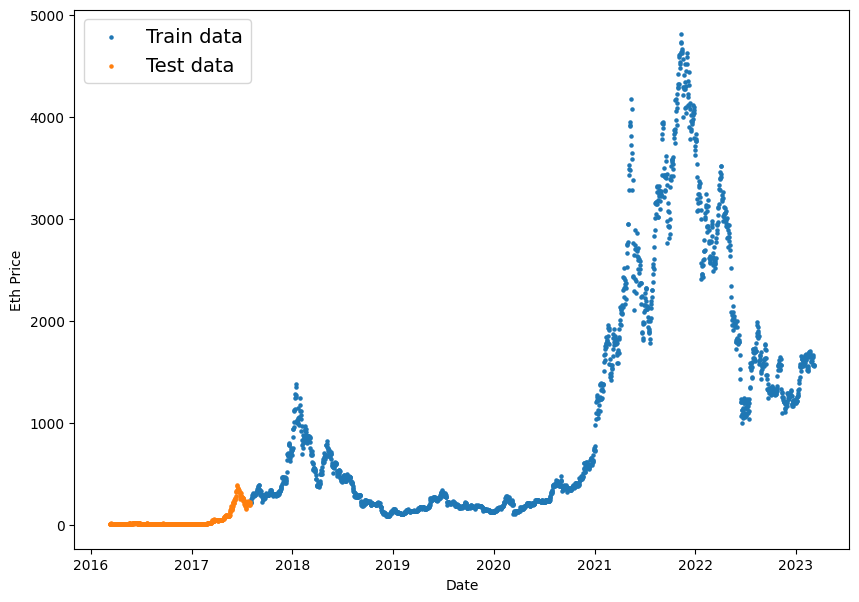

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Eth Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
import csv
from datetime import datetime
import numpy as np

timesteps = []
eth_price = []
with open("/content/drive/MyDrive/ethereum_price.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")  # read in the target CSV
    next(csv_reader)  # skip first line (this gets rid of the column titles)
    for line in reversed(list(csv_reader)):  # reverse the order of the rows
        timesteps.append(datetime.strptime(line[0], "%b %d, %Y"))  # get the dates as dates (not strings), strptime = string parse time
        price = float(line[2].replace(",", ""))  # remove commas from the price string
        eth_price.append(price)  # get the closing price as float

# View first 10 of each
print(timesteps[:10], eth_price[:10])


[datetime.datetime(2016, 3, 10, 0, 0), datetime.datetime(2016, 3, 11, 0, 0), datetime.datetime(2016, 3, 12, 0, 0), datetime.datetime(2016, 3, 13, 0, 0), datetime.datetime(2016, 3, 14, 0, 0), datetime.datetime(2016, 3, 15, 0, 0), datetime.datetime(2016, 3, 16, 0, 0), datetime.datetime(2016, 3, 17, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), datetime.datetime(2016, 3, 19, 0, 0)] [11.2, 11.75, 11.95, 12.92, 15.07, 12.63, 13.06, 12.58, 11.09, 10.97]


In [ ]:


# Get eth date array
timesteps = np.array(timesteps)
prices = np.array(eth_price)

print(timesteps[:10], prices[:10])

[datetime.datetime(2016, 3, 10, 0, 0) datetime.datetime(2016, 3, 11, 0, 0)
 datetime.datetime(2016, 3, 12, 0, 0) datetime.datetime(2016, 3, 13, 0, 0)
 datetime.datetime(2016, 3, 14, 0, 0) datetime.datetime(2016, 3, 15, 0, 0)
 datetime.datetime(2016, 3, 16, 0, 0) datetime.datetime(2016, 3, 17, 0, 0)
 datetime.datetime(2016, 3, 18, 0, 0) datetime.datetime(2016, 3, 19, 0, 0)] [11.2  11.75 11.95 12.92 15.07 12.63 13.06 12.58 11.09 10.97]


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2044, 511, 2044, 511)

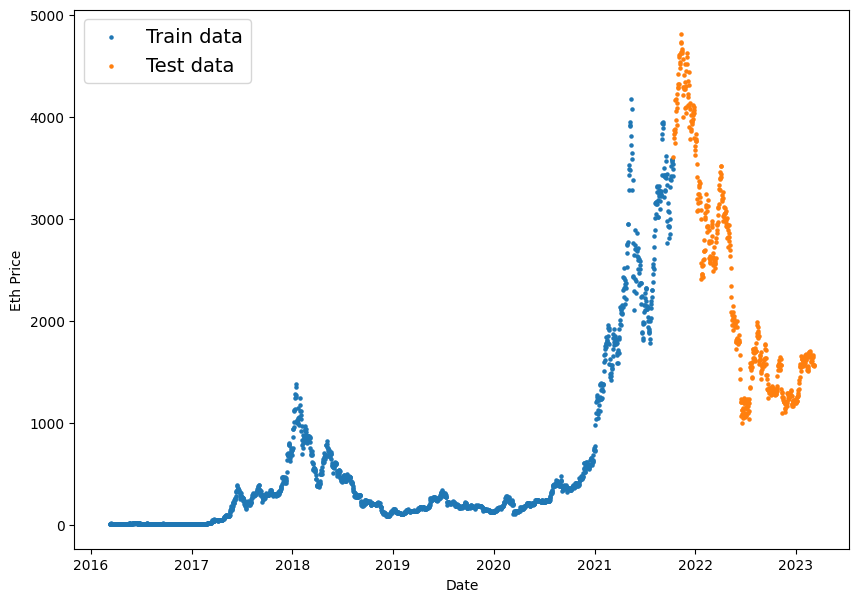

In [ ]:
# Plot correctly made splits

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Eth Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Eth Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

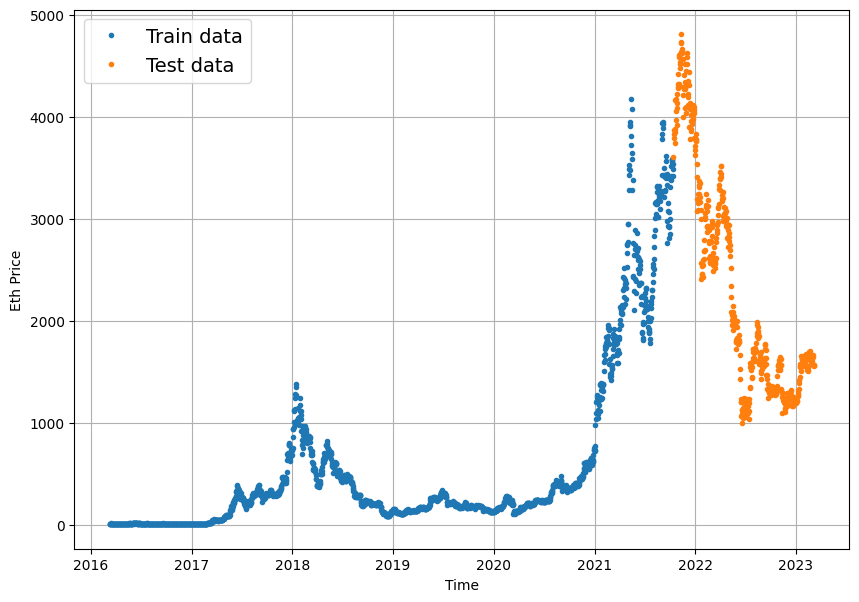

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([3607.36, 3790.34, 3869.05, 3827.55, 3848.64, 3745.46, 3876.76,
        4160.51, 4053.89, 3970.94]),
 array([1594.66, 1641.59, 1633.66, 1604.69, 1666.09, 1647.86, 1569.45,
        1566.73, 1564.36, 1565.84]))

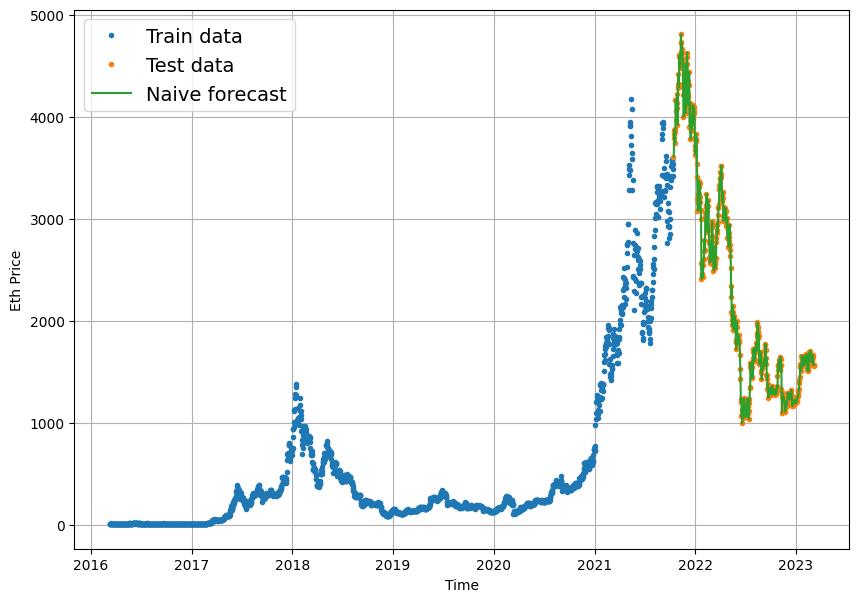

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

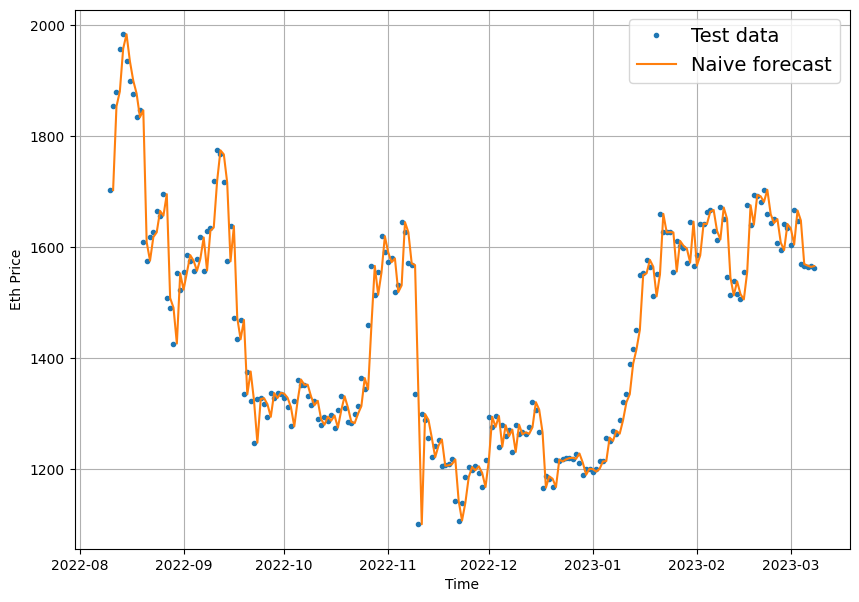

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
# Let's get TensorFlow! 
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 69.73112,
 'mse': 10131.2705,
 'rmse': 100.65421,
 'mape': 3.08917,
 'mase': 1.0032009}

In [ ]:
# Find average price of Eth in test dataset
tf.reduce_mean(y_test).numpy()

2274.8600587084147

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2548, 2548)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [11.2  11.75 11.95 12.92 15.07 12.63 13.06] -> Label: [12.58]
Window: [11.75 11.95 12.92 15.07 12.63 13.06 12.58] -> Label: [11.09]
Window: [11.95 12.92 15.07 12.63 13.06 12.58 11.09] -> Label: [10.97]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [1641.59 1633.66 1604.69 1666.09 1647.86 1569.45 1566.73] -> Label: [1564.36]
Window: [1633.66 1604.69 1666.09 1647.86 1569.45 1566.73 1564.36] -> Label: [1565.84]
Window: [1604.69 1666.09 1647.86 1569.45 1566.73 1564.36 1565.84] -> Label: [1561.79]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2038, 510, 2038, 510)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[11.2 , 11.75, 11.95, 12.92, 15.07, 12.63, 13.06],
        [11.75, 11.95, 12.92, 15.07, 12.63, 13.06, 12.58],
        [11.95, 12.92, 15.07, 12.63, 13.06, 12.58, 11.09],
        [12.92, 15.07, 12.63, 13.06, 12.58, 11.09, 10.97],
        [15.07, 12.63, 13.06, 12.58, 11.09, 10.97, 10.55]]),
 array([[12.58],
        [11.09],
        [10.97],
        [10.55],
        [10.18]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


False

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/16 [>.............................] - ETA: 1:20 - loss: 747.2990 - mae: 747.2990

16/16 [==============================] - 6s 52ms/step - loss: 441.1120 - mae: 441.1120 - val_loss: 416.9124 - val_mae: 416.9124
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 112.2596 - mae: 112.2596

16/16 [==============================] - 0s 32ms/step - loss: 82.8526 - mae: 82.8526 - val_loss: 127.4714 - val_mae: 127.4714
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 43.8355 - mae: 43.8355 - val_loss: 158.0107 - val_mae: 158.0107
Epoch 4/100
 1/16 [>.............................] - ETA: 0s - loss: 50.1545 - mae: 50.1545

16/16 [==============================] - 1s 47ms/step - loss: 35.7510 - mae: 35.7510 - val_loss: 127.2159 - val_mae: 127.2159
Epoch 5/100
13/16 [=======================>......] - ETA: 0s - loss: 33.3463 - mae: 33.3463

16/16 [==============================] - 1s 50ms/step - loss: 32.6701 - mae: 32.6701 - val_loss: 90.2908 - val_mae: 90.2908
Epoch 6/100
13/16 [=======================>......] - ETA: 0s - loss: 31.2049 - mae: 31.2049

16/16 [==============================] - 1s 65ms/step - loss: 31.4353 - mae: 31.4353 - val_loss: 87.2929 - val_mae: 87.2929
Epoch 7/100
14/16 [=========================>....] - ETA: 0s - loss: 30.0147 - mae: 30.0147

16/16 [==============================] - 1s 48ms/step - loss: 30.8925 - mae: 30.8925 - val_loss: 85.6589 - val_mae: 85.6589
Epoch 8/100
14/16 [=========================>....] - ETA: 0s - loss: 30.0331 - mae: 30.0331

16/16 [==============================] - 1s 41ms/step - loss: 30.0932 - mae: 30.0932 - val_loss: 85.2651 - val_mae: 85.2651
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 29.7866 - mae: 29.7866 - val_loss: 85.9605 - val_mae: 85.9605
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 29.3055 - mae: 29.3055 - val_loss: 96.8041 - val_mae: 96.8041
Epoch 11/100
 1/16 [>.............................] - ETA: 0s - loss: 35.9211 - mae: 35.9211

16/16 [==============================] - 0s 33ms/step - loss: 28.1369 - mae: 28.1369 - val_loss: 82.3375 - val_mae: 82.3375
Epoch 12/100
 1/16 [>.............................] - ETA: 0s - loss: 25.6037 - mae: 25.6037

16/16 [==============================] - 0s 32ms/step - loss: 26.4314 - mae: 26.4314 - val_loss: 75.8265 - val_mae: 75.8265
Epoch 13/100
16/16 [==============================] - 0s 5ms/step - loss: 25.9928 - mae: 25.9928 - val_loss: 77.0410 - val_mae: 77.0410
Epoch 14/100
 1/16 [>.............................] - ETA: 0s - loss: 23.1114 - mae: 23.1114

16/16 [==============================] - 1s 33ms/step - loss: 25.7421 - mae: 25.7421 - val_loss: 74.0094 - val_mae: 74.0094
Epoch 15/100
16/16 [==============================] - ETA: 0s - loss: 25.2553 - mae: 25.2553

16/16 [==============================] - 1s 65ms/step - loss: 25.2553 - mae: 25.2553 - val_loss: 73.9149 - val_mae: 73.9149
Epoch 16/100
13/16 [=======================>......] - ETA: 0s - loss: 24.4338 - mae: 24.4338

16/16 [==============================] - 1s 38ms/step - loss: 25.1167 - mae: 25.1167 - val_loss: 73.1078 - val_mae: 73.1078
Epoch 17/100
16/16 [==============================] - 0s 5ms/step - loss: 24.8722 - mae: 24.8722 - val_loss: 81.5256 - val_mae: 81.5256
Epoch 18/100
 1/16 [>.............................] - ETA: 0s - loss: 26.5922 - mae: 26.5922

16/16 [==============================] - 1s 34ms/step - loss: 24.8195 - mae: 24.8195 - val_loss: 72.7125 - val_mae: 72.7125
Epoch 19/100
16/16 [==============================] - 0s 6ms/step - loss: 25.5344 - mae: 25.5344 - val_loss: 84.0689 - val_mae: 84.0689
Epoch 20/100
16/16 [==============================] - 0s 6ms/step - loss: 25.9879 - mae: 25.9879 - val_loss: 78.6882 - val_mae: 78.6882
Epoch 21/100
 1/16 [>.............................] - ETA: 0s - loss: 27.8594 - mae: 27.8594

16/16 [==============================] - 0s 33ms/step - loss: 24.6718 - mae: 24.6718 - val_loss: 72.6060 - val_mae: 72.6060
Epoch 22/100
16/16 [==============================] - 0s 5ms/step - loss: 24.7284 - mae: 24.7284 - val_loss: 74.4954 - val_mae: 74.4954
Epoch 23/100
16/16 [==============================] - 0s 5ms/step - loss: 24.4304 - mae: 24.4304 - val_loss: 73.7487 - val_mae: 73.7487
Epoch 24/100
16/16 [==============================] - 0s 5ms/step - loss: 24.2575 - mae: 24.2575 - val_loss: 80.2568 - val_mae: 80.2568
Epoch 25/100
16/16 [==============================] - 0s 6ms/step - loss: 25.5151 - mae: 25.5151 - val_loss: 98.9864 - val_mae: 98.9864
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 24.8075 - mae: 24.8075 - val_loss: 74.3902 - val_mae: 74.3902
Epoch 27/100
16/16 [==============================] - 0s 5ms/step - loss: 24.1723 - mae: 24.1723 - val_loss: 73.9428 - val_mae: 73.9428
Epoch 28/100
16/16 [==============================] - 0s 5ms

16/16 [==============================] - 0s 33ms/step - loss: 24.1928 - mae: 24.1928 - val_loss: 71.6599 - val_mae: 71.6599
Epoch 31/100
 1/16 [>.............................] - ETA: 0s - loss: 29.9611 - mae: 29.9611

16/16 [==============================] - 1s 34ms/step - loss: 24.1994 - mae: 24.1994 - val_loss: 71.5037 - val_mae: 71.5037
Epoch 32/100
15/16 [===========================>..] - ETA: 0s - loss: 23.8470 - mae: 23.8470

16/16 [==============================] - 1s 35ms/step - loss: 23.9357 - mae: 23.9357 - val_loss: 71.4445 - val_mae: 71.4445
Epoch 33/100
16/16 [==============================] - 0s 5ms/step - loss: 25.3221 - mae: 25.3221 - val_loss: 122.2288 - val_mae: 122.2288
Epoch 34/100
 1/16 [>.............................] - ETA: 0s - loss: 31.9615 - mae: 31.9615

16/16 [==============================] - 1s 35ms/step - loss: 26.1432 - mae: 26.1432 - val_loss: 71.1518 - val_mae: 71.1518
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 24.3090 - mae: 24.3090 - val_loss: 77.1907 - val_mae: 77.1907
Epoch 36/100
16/16 [==============================] - 0s 6ms/step - loss: 23.8750 - mae: 23.8750 - val_loss: 71.6240 - val_mae: 71.6240
Epoch 37/100
16/16 [==============================] - 0s 5ms/step - loss: 24.1018 - mae: 24.1018 - val_loss: 72.5513 - val_mae: 72.5513
Epoch 38/100
16/16 [==============================] - 0s 6ms/step - loss: 23.5506 - mae: 23.5506 - val_loss: 71.6329 - val_mae: 71.6329
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 24.0561 - mae: 24.0561 - val_loss: 72.7173 - val_mae: 72.7173
Epoch 40/100
16/16 [==============================] - 0s 5ms/step - loss: 24.3473 - mae: 24.3473 - val_loss: 72.1189 - val_mae: 72.1189
Epoch 41/100
16/16 [==============================] - 0s 6ms

16/16 [==============================] - 1s 49ms/step - loss: 23.6086 - mae: 23.6086 - val_loss: 70.8665 - val_mae: 70.8665
Epoch 43/100
16/16 [==============================] - 0s 6ms/step - loss: 23.4782 - mae: 23.4782 - val_loss: 71.0340 - val_mae: 71.0340
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 24.2406 - mae: 24.2406 - val_loss: 82.5538 - val_mae: 82.5538
Epoch 45/100
16/16 [==============================] - 0s 6ms/step - loss: 23.9843 - mae: 23.9843 - val_loss: 74.6626 - val_mae: 74.6626
Epoch 46/100
16/16 [==============================] - 0s 5ms/step - loss: 23.9462 - mae: 23.9462 - val_loss: 77.3338 - val_mae: 77.3338
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 24.0359 - mae: 24.0359 - val_loss: 73.4379 - val_mae: 73.4379
Epoch 48/100
13/16 [=======================>......] - ETA: 0s - loss: 24.1578 - mae: 24.1578

16/16 [==============================] - 1s 41ms/step - loss: 23.8932 - mae: 23.8932 - val_loss: 70.4385 - val_mae: 70.4385
Epoch 49/100
16/16 [==============================] - 0s 8ms/step - loss: 23.3394 - mae: 23.3394 - val_loss: 73.2887 - val_mae: 73.2887
Epoch 50/100
16/16 [==============================] - 0s 8ms/step - loss: 23.9058 - mae: 23.9058 - val_loss: 77.4195 - val_mae: 77.4195
Epoch 51/100
16/16 [==============================] - 0s 8ms/step - loss: 24.6952 - mae: 24.6952 - val_loss: 89.0648 - val_mae: 89.0648
Epoch 52/100
16/16 [==============================] - 0s 8ms/step - loss: 25.1427 - mae: 25.1427 - val_loss: 76.5402 - val_mae: 76.5402
Epoch 53/100
16/16 [==============================] - 0s 7ms/step - loss: 23.4207 - mae: 23.4207 - val_loss: 71.4652 - val_mae: 71.4652
Epoch 54/100
16/16 [==============================] - 0s 10ms/step - loss: 24.2688 - mae: 24.2688 - val_loss: 70.7111 - val_mae: 70.7111
Epoch 55/100
16/16 [==============================] - 0s 8m

16/16 [==============================] - 1s 48ms/step - loss: 23.9381 - mae: 23.9381 - val_loss: 70.0584 - val_mae: 70.0584
Epoch 57/100
16/16 [==============================] - 0s 9ms/step - loss: 24.6191 - mae: 24.6191 - val_loss: 73.2206 - val_mae: 73.2206
Epoch 58/100
16/16 [==============================] - 0s 9ms/step - loss: 24.7518 - mae: 24.7518 - val_loss: 89.0957 - val_mae: 89.0957
Epoch 59/100
16/16 [==============================] - 0s 8ms/step - loss: 24.3920 - mae: 24.3920 - val_loss: 70.1398 - val_mae: 70.1398
Epoch 60/100
16/16 [==============================] - 0s 8ms/step - loss: 23.0650 - mae: 23.0650 - val_loss: 75.0377 - val_mae: 75.0377
Epoch 61/100
16/16 [==============================] - 0s 7ms/step - loss: 23.6605 - mae: 23.6605 - val_loss: 86.7067 - val_mae: 86.7067
Epoch 62/100
16/16 [==============================] - 0s 8ms/step - loss: 25.1905 - mae: 25.1905 - val_loss: 72.1228 - val_mae: 72.1228
Epoch 63/100
16/16 [==============================] - 0s 7ms

16/16 [==============================] - 1s 35ms/step - loss: 23.2135 - mae: 23.2135 - val_loss: 70.0410 - val_mae: 70.0410
Epoch 72/100
16/16 [==============================] - 0s 6ms/step - loss: 23.6876 - mae: 23.6876 - val_loss: 77.8626 - val_mae: 77.8626
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 24.0066 - mae: 24.0066 - val_loss: 98.1043 - val_mae: 98.1043
Epoch 74/100
16/16 [==============================] - 0s 6ms/step - loss: 24.3959 - mae: 24.3959 - val_loss: 74.3902 - val_mae: 74.3902
Epoch 75/100
16/16 [==============================] - 0s 6ms/step - loss: 23.5709 - mae: 23.5709 - val_loss: 71.1672 - val_mae: 71.1672
Epoch 76/100
16/16 [==============================] - 0s 6ms/step - loss: 23.1696 - mae: 23.1696 - val_loss: 71.6569 - val_mae: 71.6569
Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 23.3108 - mae: 23.3108 - val_loss: 77.6314 - val_mae: 77.6314
Epoch 78/100
16/16 [==============================] - 0s 6ms

16/16 [==============================] - 0s 33ms/step - loss: 23.8259 - mae: 23.8259 - val_loss: 69.9384 - val_mae: 69.9384
Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 23.3157 - mae: 23.3157 - val_loss: 77.1729 - val_mae: 77.1729
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 23.7404 - mae: 23.7404 - val_loss: 70.8869 - val_mae: 70.8869
Epoch 85/100
16/16 [==============================] - ETA: 0s - loss: 23.7159 - mae: 23.7159

16/16 [==============================] - 1s 36ms/step - loss: 23.7159 - mae: 23.7159 - val_loss: 69.8923 - val_mae: 69.8923
Epoch 86/100
16/16 [==============================] - 0s 5ms/step - loss: 23.4809 - mae: 23.4809 - val_loss: 73.1820 - val_mae: 73.1820
Epoch 87/100
16/16 [==============================] - 0s 6ms/step - loss: 23.4635 - mae: 23.4635 - val_loss: 78.8109 - val_mae: 78.8109
Epoch 88/100
16/16 [==============================] - 0s 6ms/step - loss: 24.9776 - mae: 24.9776 - val_loss: 85.7971 - val_mae: 85.7971
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 23.8019 - mae: 23.8019 - val_loss: 74.6260 - val_mae: 74.6260
Epoch 90/100
16/16 [==============================] - 0s 5ms/step - loss: 23.5211 - mae: 23.5211 - val_loss: 71.3458 - val_mae: 71.3458
Epoch 91/100
16/16 [==============================] - 0s 6ms/step - loss: 23.3048 - mae: 23.3048 - val_loss: 80.8111 - val_mae: 80.8111
Epoch 92/100
16/16 [==============================] - 0s 5ms

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 70.1238 - mae: 70.1238


[70.12380981445312, 70.12380981445312]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 4ms/step - loss: 69.8924 - mae: 69.8924


[69.8923568725586, 69.8923568725586]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

16/16 [==============================] - 0s 5ms/step


(510,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([3581.2651, 3771.1655, 3851.584 , 3857.1675, 3849.529 , 3758.0195,
        3856.243 , 4118.354 , 4070.8215, 4003.4187], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 69.89235,
 'mse': 10258.19,
 'rmse': 101.28272,
 'mape': 3.1112282,
 'mase': 1.0055205}

In [ ]:
naive_results

{'mae': 69.73112,
 'mse': 10131.2705,
 'rmse': 100.65421,
 'mape': 3.08917,
 'mase': 1.0032009}

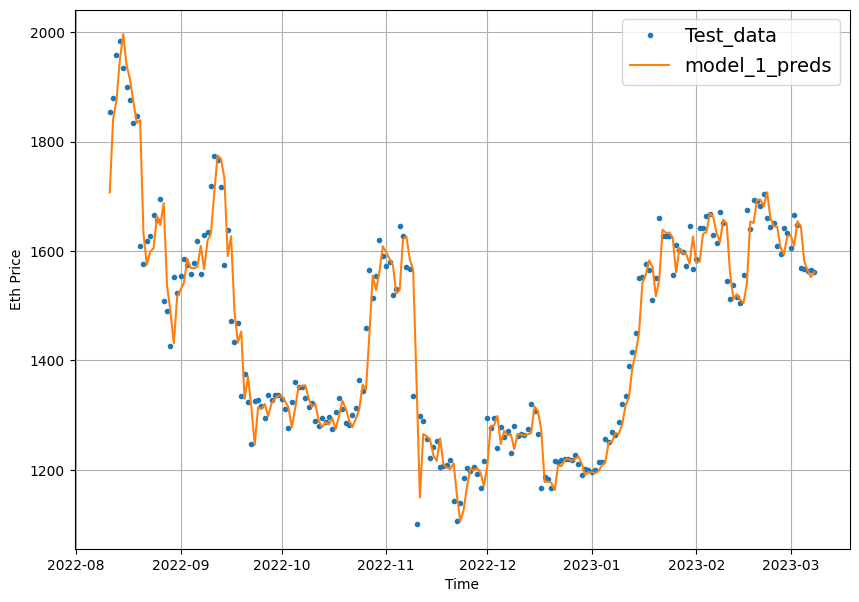

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2525, 2525)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2020, 505, 2020, 505)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 80.5611


80.56105041503906

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 76.4344


76.43444061279297

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 76.43445,
 'mse': 12075.184,
 'rmse': 109.88714,
 'mape': 3.4719472,
 'mase': 1.1005267}

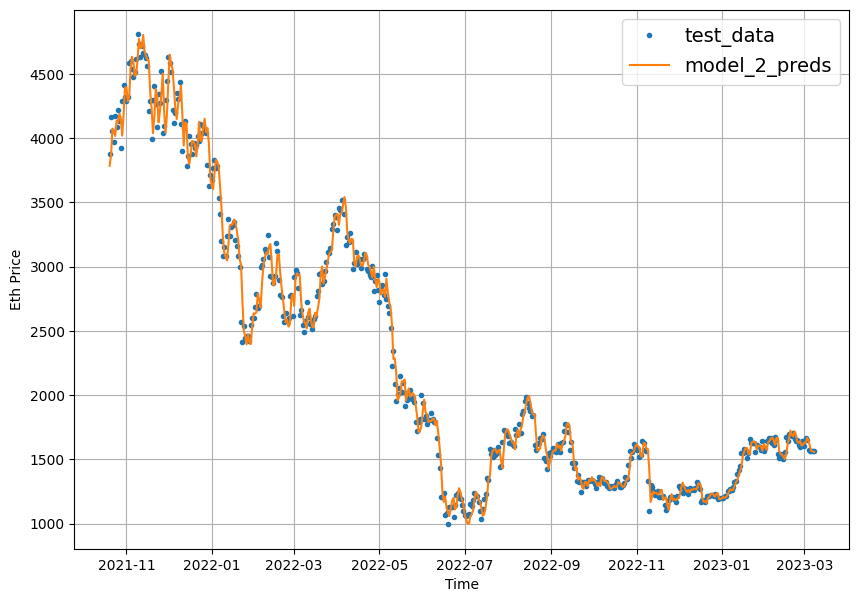

In [ ]:
offset = 0
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2519, 2519)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2015, 504, 2015, 504)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 143.6801


143.6801300048828

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 139.3948


139.39483642578125

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

16/16 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[3514.732 , 3592.769 , 3599.3237, 3548.0706, 3528.4048, 3427.7092,
        3503.397 ],
       [3701.496 , 3776.585 , 3680.4553, 3701.0178, 3701.7942, 3605.7832,
        3641.6624],
       [3818.5483, 3820.3237, 3826.5254, 3897.3015, 3791.3877, 3704.326 ,
        3796.8562],
       [3776.65  , 3893.8933, 3891.4597, 3970.2224, 3802.2812, 3772.8237,
        3823.4   ],
       [3757.5977, 3865.6807, 3979.072 , 3962.583 , 3894.3877, 3798.1511,
        3925.247 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([343.4148  , 224.72366 , 147.38493 , 174.36217 , 128.6565  ,
        298.55722 , 248.25938 , 116.53868 ,  81.15224 , 212.4458  ,
        154.15611 , 156.58032 , 103.78027 , 129.84196 , 328.23923 ,
        201.27567 , 101.65576 , 143.77078 , 153.11008 , 235.33182 ,
        144.38135 , 136.63498 , 108.780556, 119.953964, 141.75154 ,
         99.91462 , 185.71687 , 175.98068 , 232.57387 , 356.9322  ,
        349.43527 , 411.86118 , 384.87164 , 341.2811  , 149.9707  ,
        155.4802  , 284.7337  , 194.84706 , 177.82307 , 100.68844 ,
        213.0581  , 248.57259 , 259.67294 , 246.72234 , 173.99446 ,
        320.36478 , 192.37639 , 163.54416 , 277.46295 , 310.4681  ,
        296.13705 , 213.57143 , 170.78459 , 173.22517 , 227.613   ,
        204.86057 , 338.5602  , 235.69998 , 142.6446  , 148.5179  ,
        146.88913 ,  95.9254  , 153.3094  ,  96.16427 ,  91.6191  ,
        105.97698 ,  92.48019 , 158.12183 , 116.65963 ,  70.13344 ,
        154.99965 , 214.91379 , 226.97816

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 139.39482,
 'mse': 39284.555,
 'rmse': 160.2312,
 'mape': 6.5052447,
 'mase': 1.9966621}

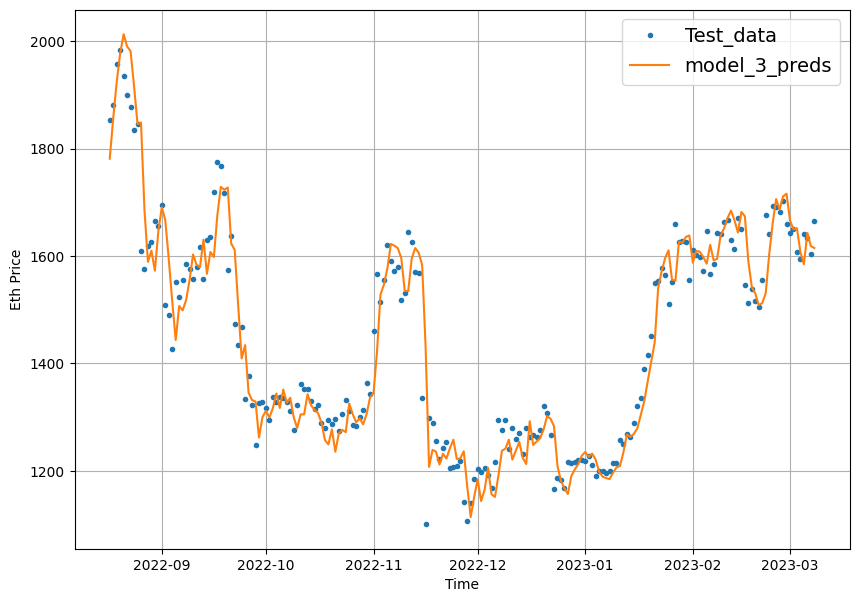

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

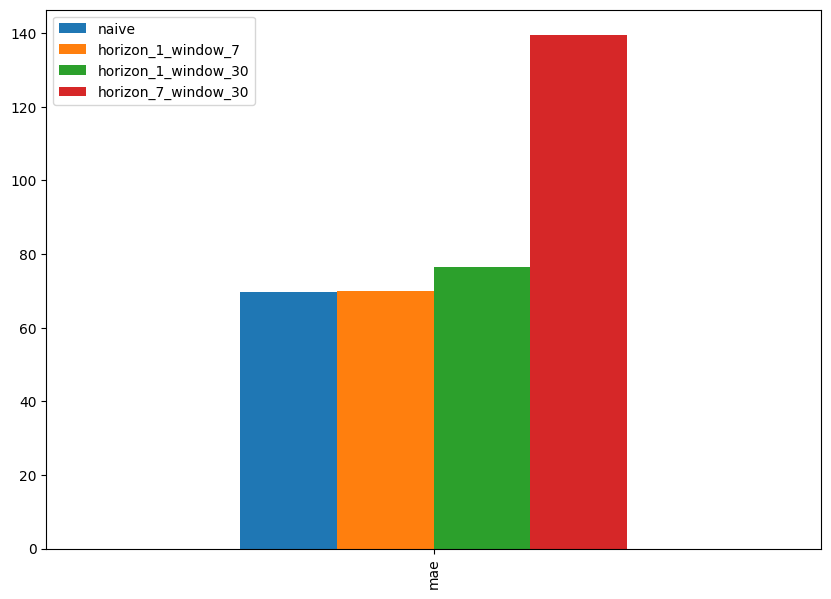

In [ ]:
import pandas as pd
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2548, 2548)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2038, 510, 2038, 510)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[11.2 ]
 [11.75]
 [11.95]
 [12.92]
 [15.07]
 [12.63]
 [13.06]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 8ms/step - loss: 70.7582


70.75823211669922

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

16/16 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3570.5764, 3743.2812, 3850.1367, 3858.207 , 3855.8496, 3773.7295,
       3843.1975, 4082.3474, 4079.8157, 4012.048 ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 70.758224,
 'mse': 10581.435,
 'rmse': 102.8661,
 'mape': 3.1569946,
 'mase': 1.0179776}

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 72.9614


72.96139526367188

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

16/16 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3578.1174, 3718.4614, 3831.7427, 3877.3848, 3869.1726, 3802.735 ,
       3860.195 , 4047.1414, 4082.1887, 4054.4565], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 72.961395,
 'mse': 11337.62,
 'rmse': 106.478264,
 'mape': 3.288183,
 'mase': 1.0496739}